In [1]:
! git clone https://github.com/PhillipOBonsu/pca_assignment.git

Cloning into 'pca_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 1.54 MiB | 5.18 MiB/s, done.


In [2]:
import pickle
with open('pca_assignment/data/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

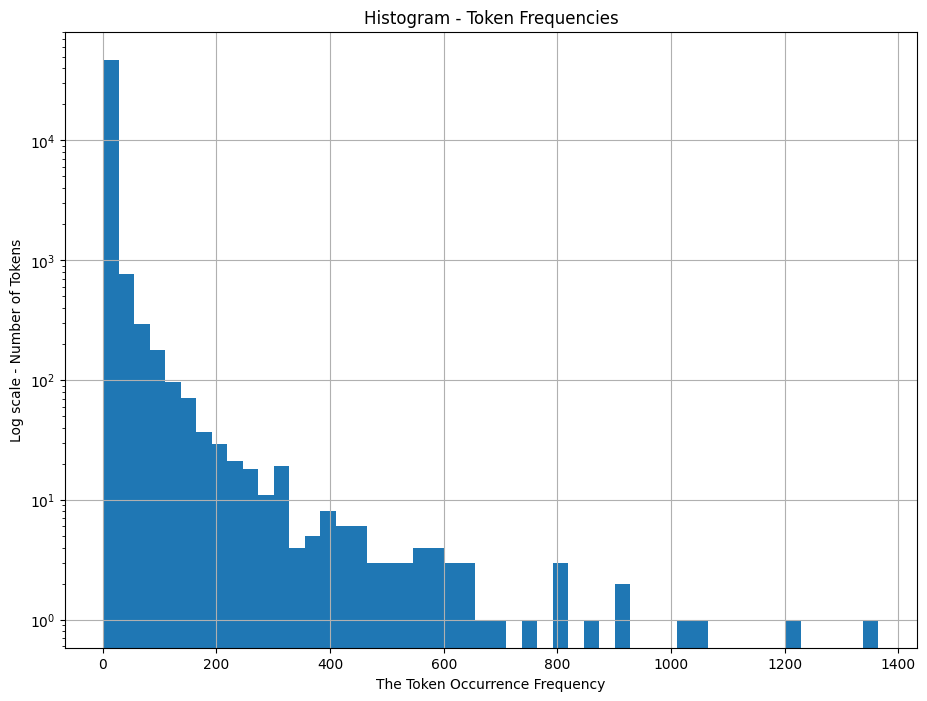

In [3]:
# Question 1
# Histogram creation
import matplotlib.pyplot as plt
import numpy as np

# Frequency extractions from token_freq
frequencies = [freq for token, freq in token_freq]

# Plotting Histogram
plt.figure(figsize=(11, 8))
plt.hist(frequencies, bins=50, log=True)
plt.xlabel("The Token Occurrence Frequency")
plt.ylabel("Log scale - Number of Tokens")
plt.title("Histogram - Token Frequencies")
plt.grid(True)
plt.show()

From the histogram, I observed that the distribution is highly skewed. The token frequency shows a logarithmic relationship. As the frequency of tokens occurances increase, the number of tokens decrease.

In [4]:
# Question 2
# Loading in Phishing_clean.parquet
import pandas as pd
df = pd.read_parquet('/content/pca_assignment/data/Phishing_clean.parquet')

In [5]:
# Question 2.1
# Performing an 80/20 train test split of the data
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Email Type'])
y = df['Email Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (14907, 2711)
X_test Shape: (3727, 2711)
y_train Shape: (14907,)
y_test Shape: (3727,)


In [6]:
# Question 2.2
# Regression of y on the one-hot-encoded emails
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Training and Initializing the model
model = LinearRegression()
model.fit(X_train, y_train)

# Training and test set prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-squared Calculation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared - training set: {r2_train:.4f}")
print(f"R-squared - test set: {r2_test:.4f}")

R-squared - training set: 0.7670
R-squared - test set: 0.6659


The R^2 on the test set is 0.6659 and on the training set is 0.7670.

In [7]:
# Question 2.3
# Finding the words with the largest coefficients
large_coefficients = model.coef_
feature_names = X_train.columns

# Create a pandas series for simple handling
coef_series = pd.Series(large_coefficients, index=feature_names)

# Sorting the coefficients by absolute value and get the top N
Top_number = 25
Top_Influential_Words = coef_series.abs().sort_values(ascending=False).head(Top_number)

# Displaying the top influential words and their coefficients by absolute value
print("The top influential words & their coefficients - by absolute value:")
print(coef_series[Top_Influential_Words.index])

The top influential words & their coefficients - by absolute value:
intervention        -1.259257
localized            0.824350
thermal              0.747006
crawler              0.696167
background-image:   -0.622909
helvetica,           0.598560
aging                0.594956
form.                0.576886
gray;               -0.574480
a:active             0.574480
retrieving          -0.573761
zdnet               -0.560954
{text-decoration:    0.497075
xanaax               0.491981
transcript           0.488978
shopper             -0.486678
april's             -0.486483
arial,              -0.482141
laser                0.473607
issue:              -0.465547
rcs                  0.460975
cnet                -0.453777
ricky                0.447620
girlfriend           0.444575
rhythm               0.438924
dtype: float64


THe most influential words, ranked by the absoulte value of their coefficients, include localized, thermal, crawler, helvetica, aging, form, xanaax, laser, and decoration.

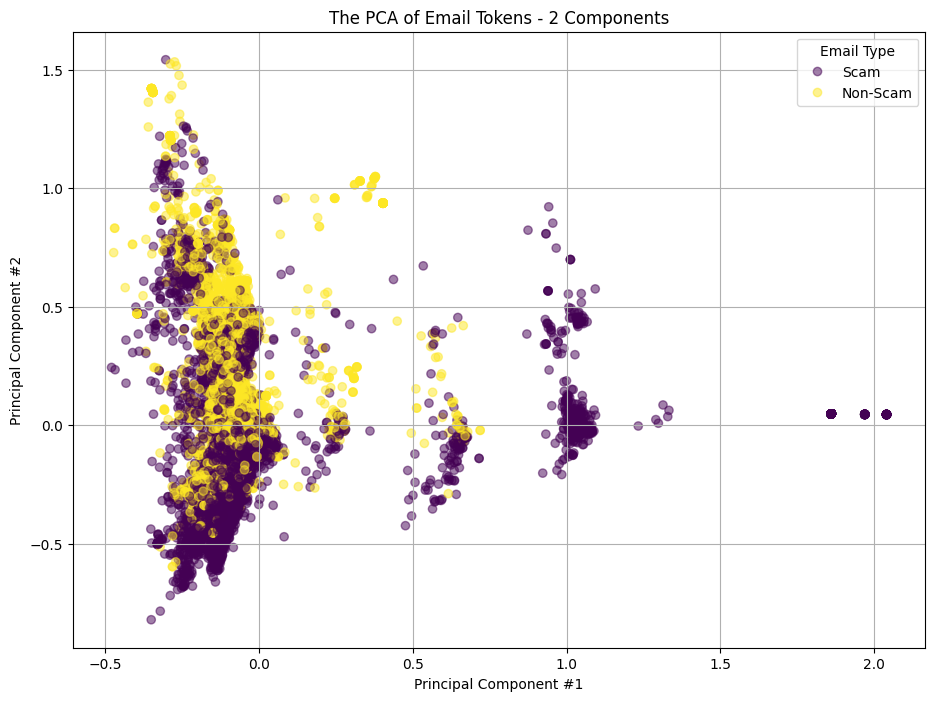

In [8]:
# Question 3
# PCA with two components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of first two principal components
plt.figure(figsize=(11, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)

# Addig titles and lables to graph
plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.title("The PCA of Email Tokens - 2 Components")

# Including a color bar to identify email type - 1 for scam and 0 for non-scam
legend_labels = ['Scam', 'Non-Scam']
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Email Type")


plt.grid(True)
plt.show()


Per the graph, the two colors heavily mix this indicates that the first two components alone aren't sufficient enough to distingiush between the two classes. This suggests that hte model does not effectively separate non-scam from scam emails.

In [9]:
# Question 4
# Performing PCA with 2,610 components
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pca_2610 = PCA(n_components=2610)
X_pca_2610 = pca_2610.fit_transform(X)

# Splitting the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2610, y, test_size=0.5, random_state=45)

# Linear regression on the principal components
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Calculating and Predicting R-squared
y_training_predicting_pca = model_pca.predict(X_train_pca)
y_testing_predicting_pca = model_pca.predict(X_test_pca)

r2_training_pca = r2_score(y_train, y_training_predicting_pca)
r2_testing_pca = r2_score(y_test, y_testing_predicting_pca)

print(f"PCA R-squared - training set: {r2_training_pca:.4f}")
print(f"PCA R-squared -  test set: {r2_testing_pca:.4f}")

PCA R-squared - training set: 0.7968
PCA R-squared -  test set: 0.6059


Compared to the linerar regression model, this approach performed similarly. The R^2 on the test set was marginally higher for the model trained on PCA. This suggests that it may marginally do better against unseen data.

Question 5: Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.


Answer: The advantage of using principal components for high-dimensional regression is that they transform the data into uncorrelated features capturing the most important patterns, which can improve model performance compared to using the original data.